In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('./data science/1645792390_cep1_dataset.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

# Treating Outliers

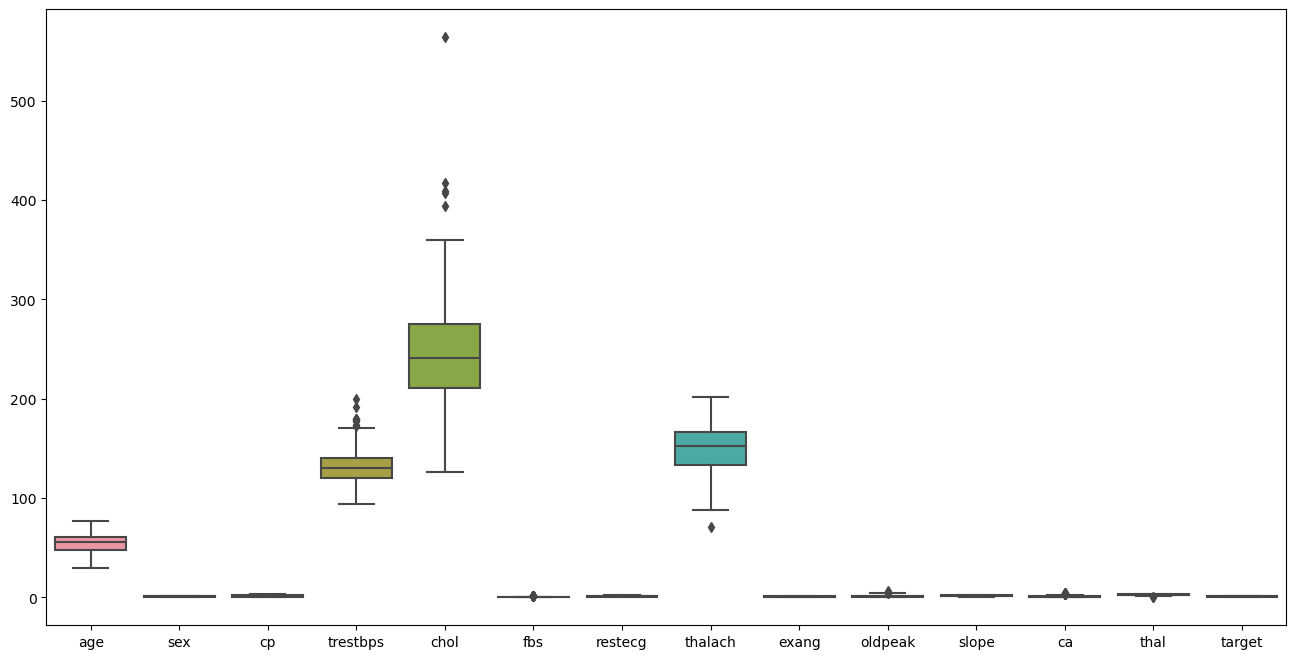

In [8]:
plt.figure(figsize=(16,8))
sns.boxplot(data = data)
plt.show()

<Axes: >

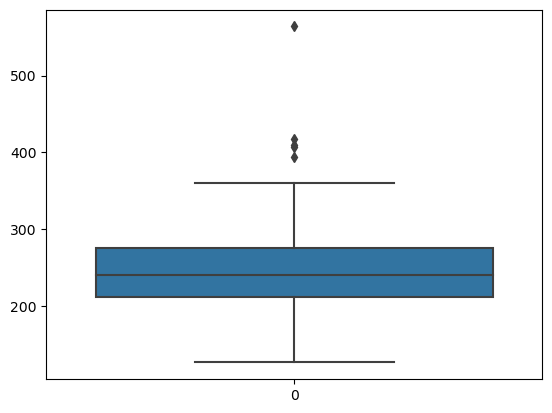

In [9]:
sns.boxplot(data.chol)

In [10]:
data=data.drop(data[data['chol']>380].index)

<Axes: >

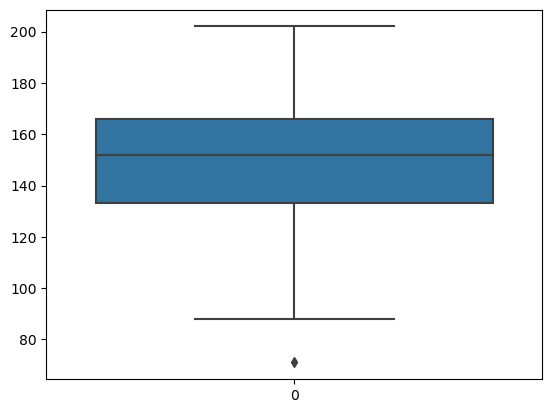

In [11]:
sns.boxplot(data.thalach)

In [12]:
data = data.drop(data[data['thalach']<80].index)

<Axes: >

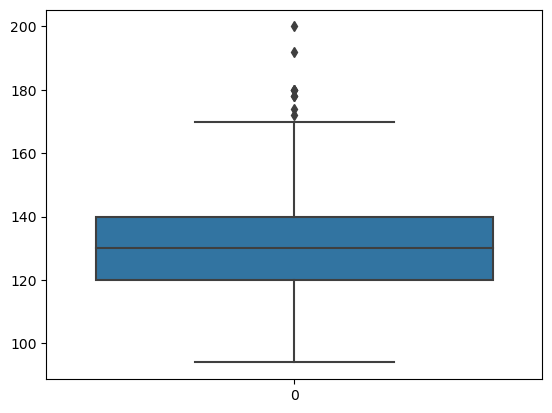

In [13]:
sns.boxplot(data.trestbps)

In [14]:
data = data.drop(data[data['trestbps']>170].index)

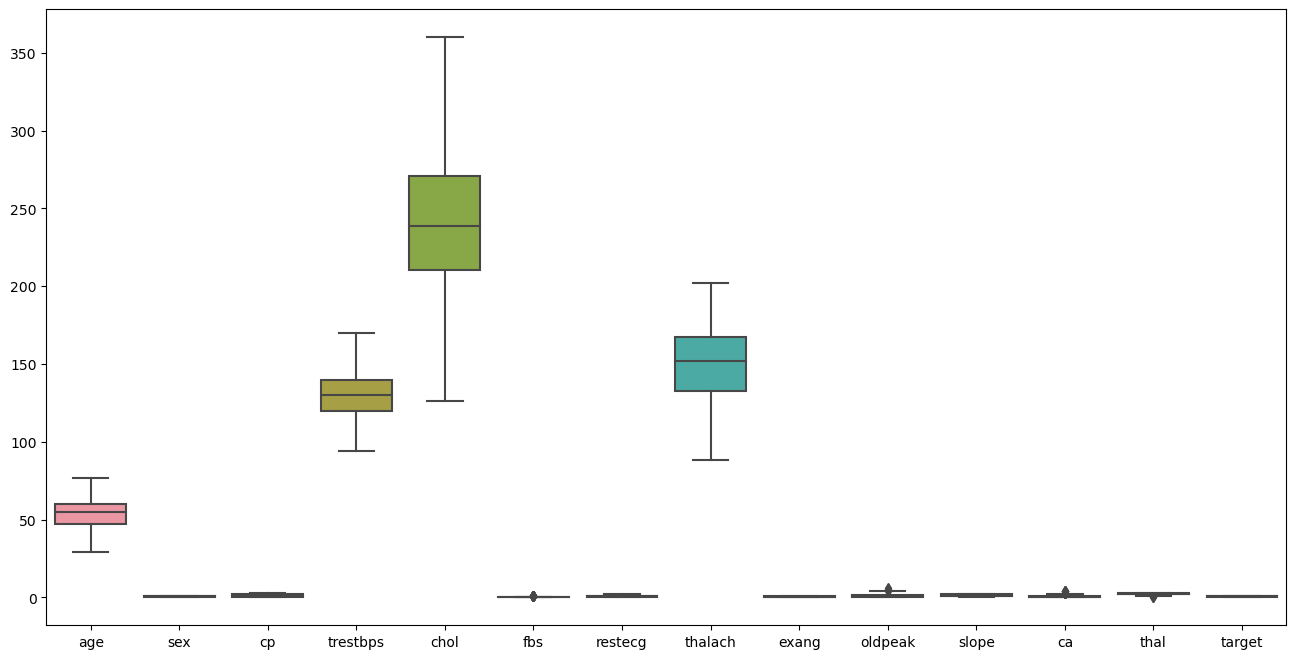

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(data = data)
plt.show()

# Categorical Data

In [16]:
cat_data = data.drop(['age','trestbps','chol','thalach','oldpeak'],axis = 1)
cat_data.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [17]:
cat_data.describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.700348,0.972125,0.139373,0.529617,0.320557,1.411150,0.717770,2.299652,0.550523
std,0.458906,1.030610,0.346940,0.520551,0.467506,0.613041,1.007211,0.615164,0.498310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


## plotting countplot for categorical data

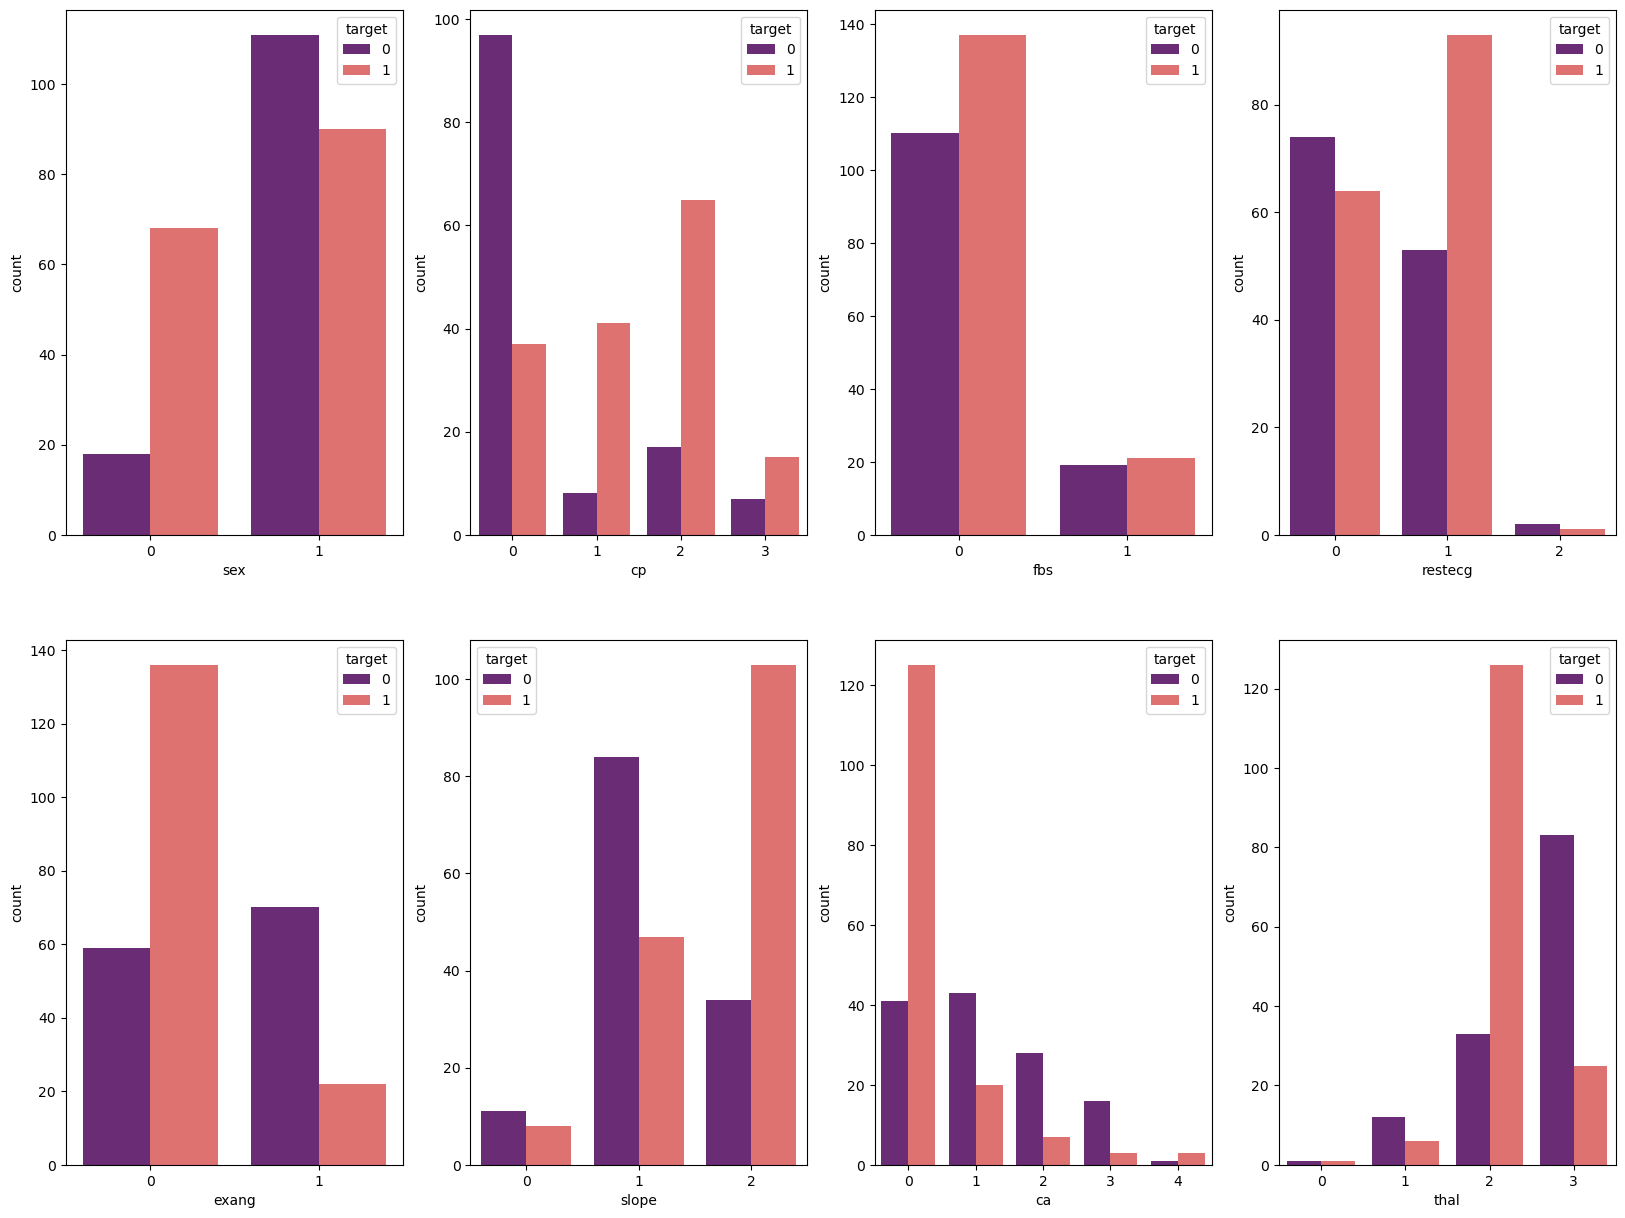

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))

plots = [
    ('sex', 0, 0),
    ('cp', 0, 1),
    ('fbs', 0, 2),
    ('restecg', 0, 3),
    ('exang', 1, 0),
    ('slope', 1, 1),
    ('ca', 1, 2),
    ('thal', 1, 3)
]

for plot, row, col in plots:
    sns.countplot(x=cat_data[plot], hue=cat_data['target'],palette='magma', ax=ax[row, col])

plt.show()

## Occurrence of CVD across the Age category

In [19]:
data['target'].value_counts()

1    158
0    129
Name: target, dtype: int64

<Axes: xlabel='age', ylabel='count'>

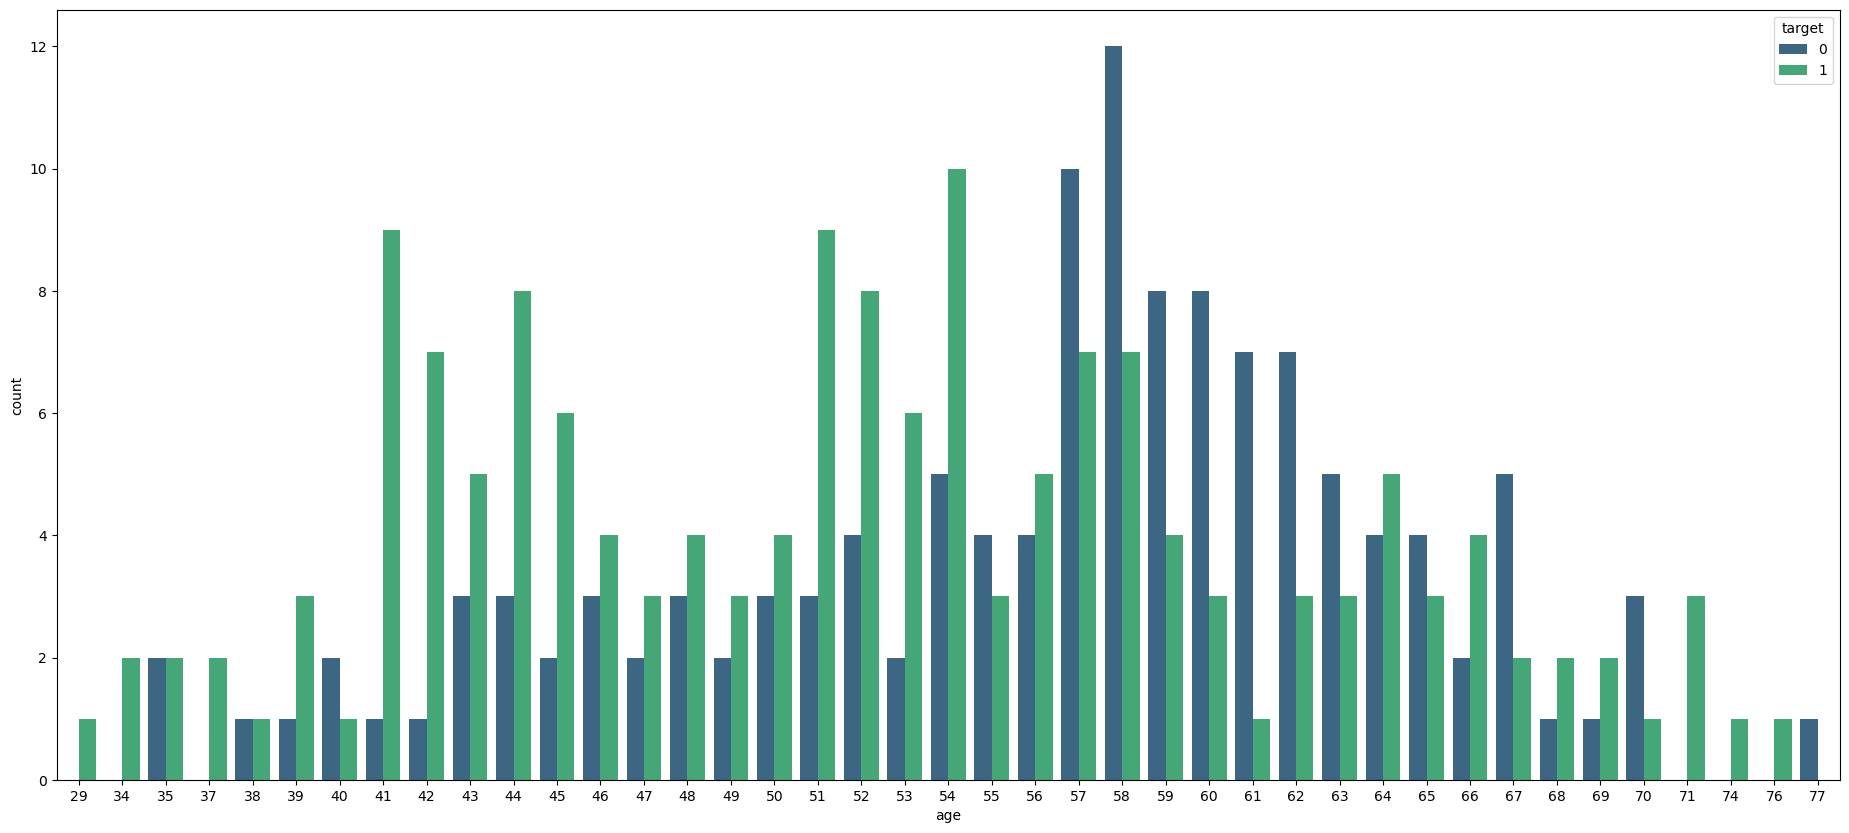

In [20]:
plt.figure(figsize=(23,10))
sns.countplot(data=data,x='age',hue='target',palette='viridis')

## Composition of all patients with respect to the Sex category

In [21]:
data['sex'].value_counts()

1    201
0     86
Name: sex, dtype: int64

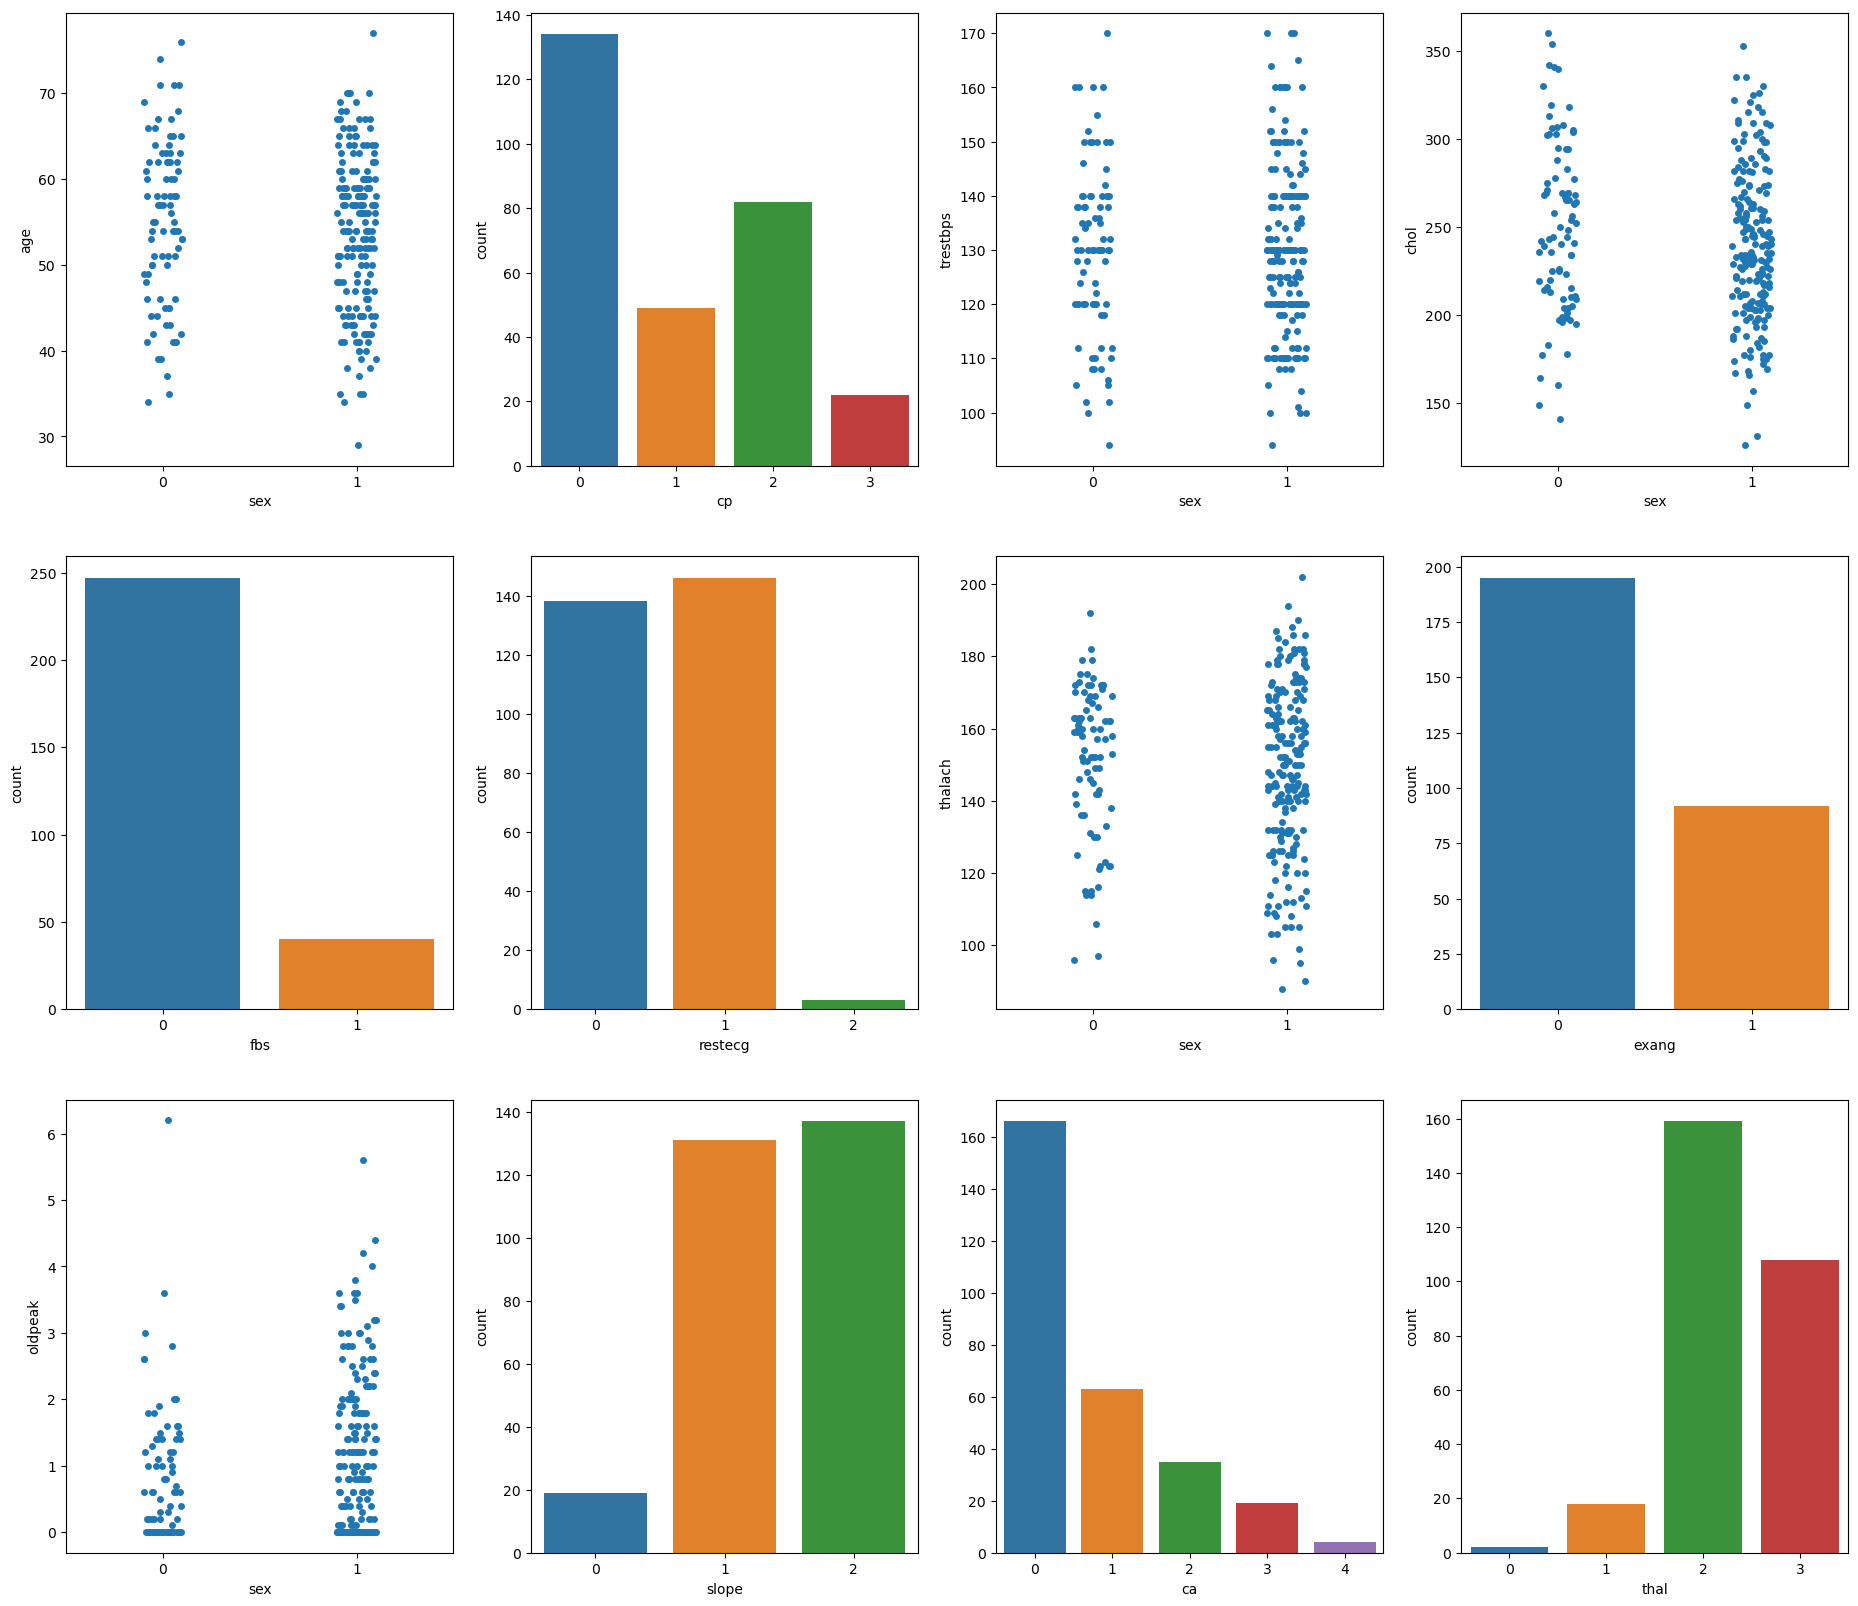

In [22]:
fig, ax = plt.subplots(3, 4)

sns.stripplot(data=data, x='sex', y='age', ax=ax[0, 0])
sns.countplot(data=data, x='cp', ax=ax[0, 1])
sns.stripplot(data=data, x='sex', y='trestbps', ax=ax[0, 2])
sns.stripplot(data=data, x='sex', y='chol', ax=ax[0, 3])
sns.countplot(data=data, x='fbs', ax=ax[1, 0])
sns.countplot(data=data, x='restecg', ax=ax[1, 1])
sns.stripplot(data=data, x='sex', y='thalach', ax=ax[1, 2])
sns.countplot(data=data, x='exang', ax=ax[1, 3])
sns.stripplot(data=data, x='sex', y='oldpeak', ax=ax[2, 0])
sns.countplot(data=data, x='slope', ax=ax[2, 1])
sns.countplot(data=data, x='ca', ax=ax[2, 2])
sns.countplot(data=data, x='thal', ax=ax[2, 3])

fig.set_figheight(20)
fig.set_figwidth(23)
plt.show()

# Relationship between cholesterol levels and a target variable

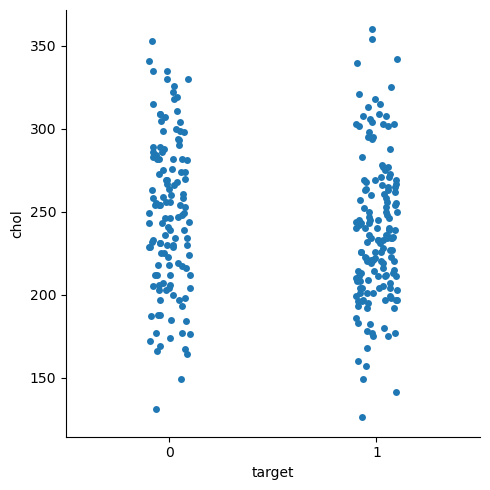

In [23]:
sns.catplot(data=data, x="target", y="chol",kind='strip')

# Relationship between peak exercising and the occurrence of a heart attack

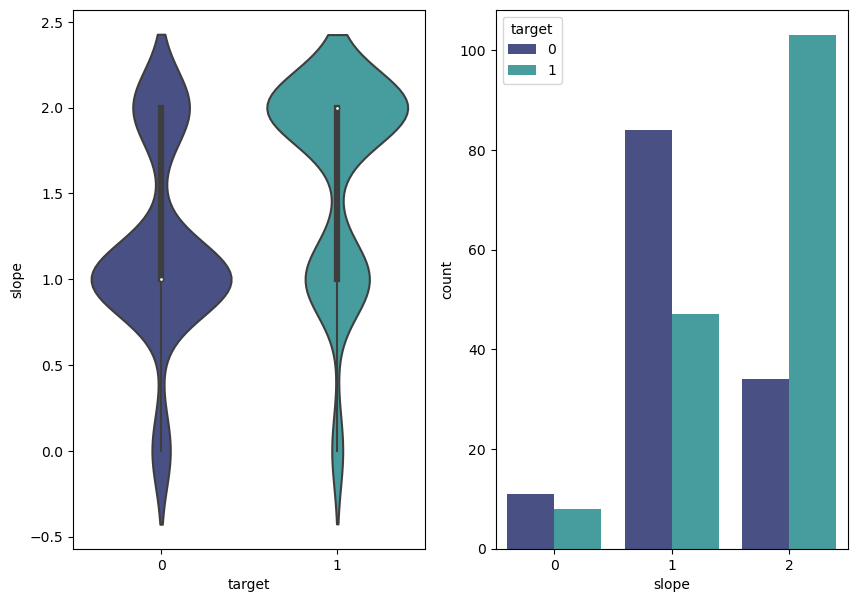

In [24]:
fig, ax = plt.subplots(1, 2)

sns.violinplot(data=data, x='target', y='slope', ax=ax[0],palette='mako')
sns.countplot(data=data, x='slope', hue='target', ax=ax[1],palette='mako')

fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()

# Pair Plot

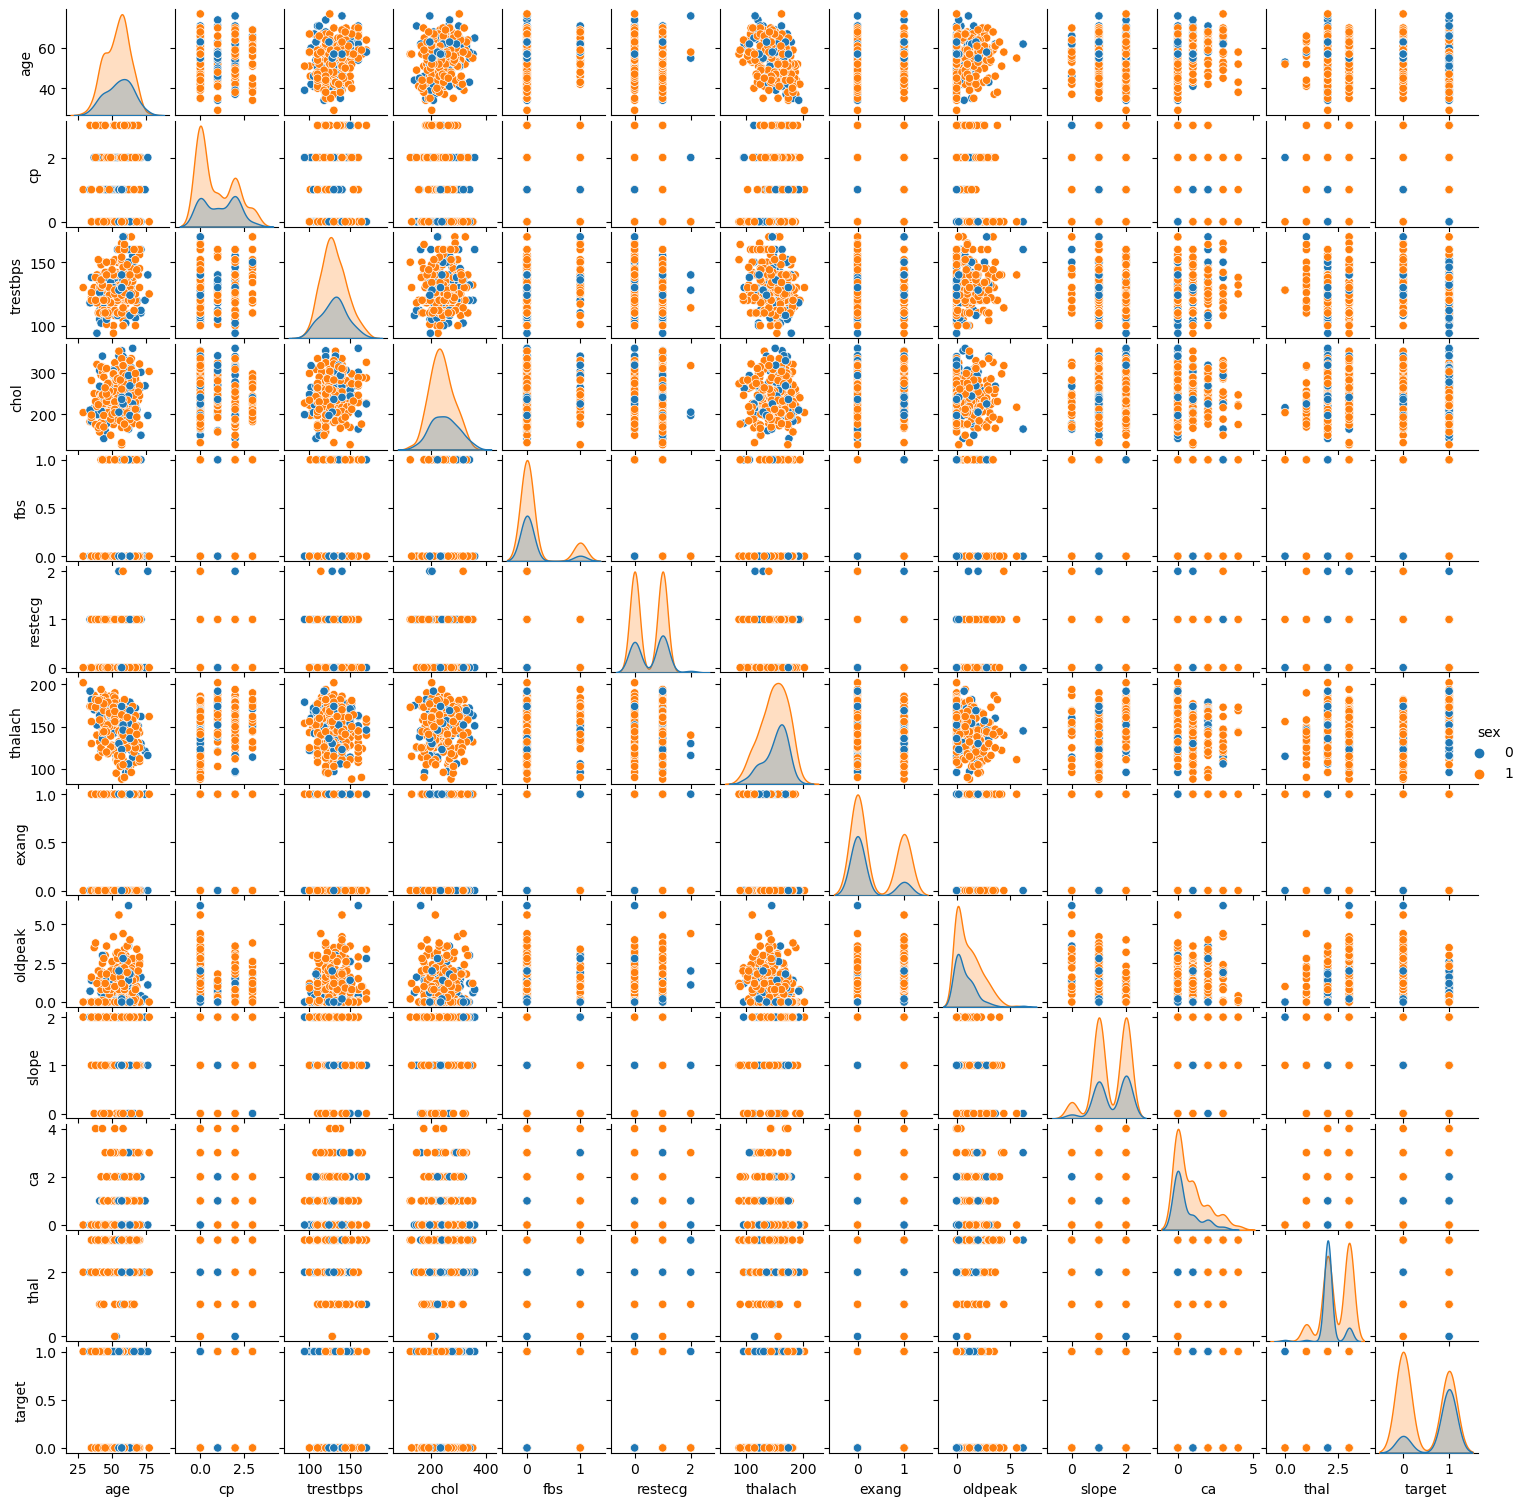

In [25]:
g = sns.pairplot(data,hue='sex')
g.fig.set_size_inches(15,15)

# Heatmap

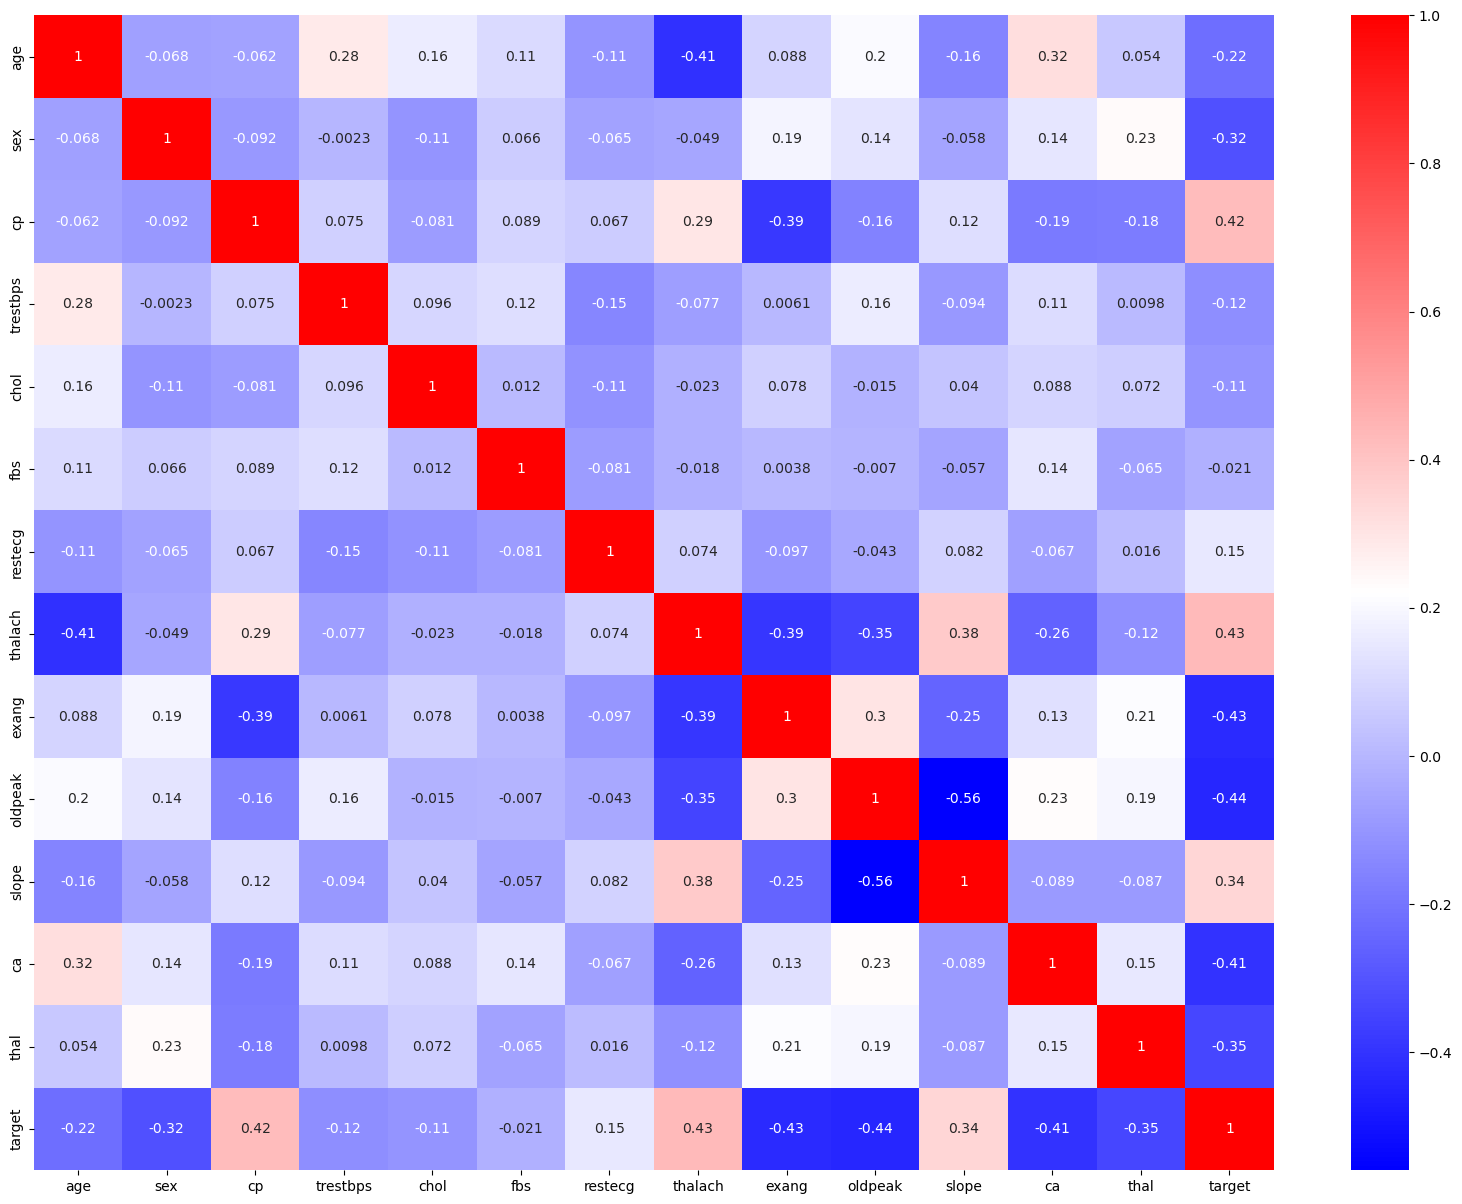

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='bwr')
plt.show()

# Splitting and Scaling the data 

In [27]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [28]:
X_train.shape,X_test.shape

((200, 13), (87, 13))

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train,X_test

(array([[-0.26933047,  0.60045334,  0.01881775, ...,  1.00180287,
         -0.72199487, -0.50071013],
        [ 0.53808421,  0.60045334,  1.90059257, ..., -0.57583944,
         -0.72199487,  1.08884583],
        [-0.96140018, -1.66540833,  0.01881775, ...,  1.00180287,
         -0.72199487, -0.50071013],
        ...,
        [-1.07674514,  0.60045334, -0.92206966, ..., -0.57583944,
         -0.72199487, -0.50071013],
        [ 1.80687869,  0.60045334,  0.95970516, ..., -0.57583944,
          0.30942637,  1.08884583],
        [ 1.57618879,  0.60045334,  0.95970516, ...,  1.00180287,
          0.30942637,  1.08884583]]),
 array([[-0.15398551, -1.66540833,  0.95970516, ...,  1.00180287,
         -0.72199487, -3.67982204],
        [-1.6534699 ,  0.60045334, -0.92206966, ...,  1.00180287,
         -0.72199487,  1.08884583],
        [ 0.42273925,  0.60045334, -0.92206966, ...,  1.00180287,
          1.34084762,  1.08884583],
        ...,
        [ 0.65342916, -1.66540833,  1.90059257, ...,  

## Classification Models

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from xgboost import XGBClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

## Logistic Regression

In [32]:
LR = LogisticRegression() 

LR = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

LR_acc=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",LR_acc,'%')

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.88      0.91      0.89        55

    accuracy                           0.86        87
   macro avg       0.86      0.85      0.85        87
weighted avg       0.86      0.86      0.86        87


Accuracy: 86.21 %


# Random forest

In [33]:
RFC=RandomForestClassifier(n_estimators=100,criterion =  "entropy")

RFC = RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

RFC_acc=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",RFC_acc,'%')

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.84      0.85      0.85        55

    accuracy                           0.80        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.80      0.80      0.80        87


Accuracy: 80.46 %


## SVM classifier

In [34]:
SVC = svm.SVC()

SVC = SVC.fit(X_train,y_train)
y_pred = SVC.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

SVC_acc=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",SVC_acc,'%')

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.88      0.84      0.86        55

    accuracy                           0.83        87
   macro avg       0.81      0.82      0.82        87
weighted avg       0.83      0.83      0.83        87


Accuracy: 82.76 %


## XGBoost

In [35]:
XGB=XGBClassifier(n_estimators=30)

XGB = XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

XGB_acc=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",XGB_acc,'%')

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.84      0.87      0.86        55

    accuracy                           0.82        87
   macro avg       0.80      0.80      0.80        87
weighted avg       0.81      0.82      0.81        87


Accuracy: 81.61 %


## Model Evaluation

In [36]:
model_ev = pd.DataFrame({'Model':['LR','RFC','XGB','SVC'],
                    'Accuracy %':[LR_acc,RFC_acc,XGB_acc,SVC_acc]
                                })

model_ev.sort_values(by='Accuracy %')
model_ev

,Model,Accuracy %
0,LR,86.21
1,RFC,80.46
2,XGB,81.61
3,SVC,82.76


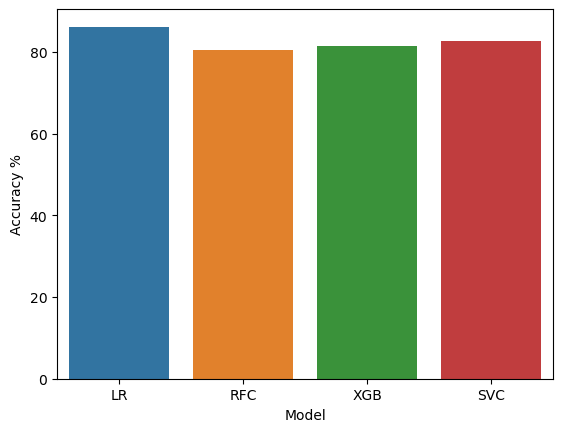

In [37]:
sns.barplot(x='Model',y='Accuracy %',data=model_ev)
plt.show()

## Best Model

#### In our Dataset of Cardiovascular Disease, Logistic Regression works best among all the other algorithms with an accuracy of 86.2%